## Model Drift Removal

This is a test notebook for model drift removal. The model may have a significant drift over time and, in order to remove the drift, we look for linear (or higher order trend) in output variables. For this, we compute mean of required variables over all ensembles and simulations (irrespetive of start year). We compute yearly-mean to remove seasonal cycle and save these datasets for further analysis.   

In [1]:
import numpy as np
import scipy as sc
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
## ------ Read Data (few tests for check only) ------------------ ##

ppdir="/home/users/hkhatri/DePreSys4_Data/Data_Consolidated/"

# variable list to keep in the dataset
var_list = ['hfbasin_atlantic', 'hfbasinpmdiff_atlantic', 'hfovgyre_atlantic', 'hfovovrt_atlantic', 'sophtadv_atlantic', 
            'sltbasin_atlantic', 'sltbasinpmdiff_atlantic', 'sltovgyre_atlantic', 'sltovovrt_atlantic', 'sopstadv_atlantic',
            'zomsfatl', 'zosalatl','zosrfatl']

ds = []

# Loop over year to combine indivual year files
for year in range(1960, 2017, 20):
    
    d = xr.open_dataset(ppdir + str(year) + "_diaptr.nc", chunks={'r':1})
    d = d.get(var_list)
    ds.append(d)
    
ds = xr.concat(ds, dim='start_year')

ds = ds.assign(start_year = np.arange(1960, 2017, 20))

ds = ds.chunk({'start_year': 1})

print(ds)

<xarray.Dataset>
Dimensions:                  (deptht: 75, depthw: 75, r: 10, start_year: 3, time_counter: 125, x: 1, y: 451)
Coordinates:
    nav_lon                  (y, x) float32 dask.array<shape=(451, 1), chunksize=(451, 1)>
  * deptht                   (deptht) float32 0.50576 1.5558553 ... 5902.0576
  * depthw                   (depthw) float32 0.0 1.0239066 ... 5596.249 5800.0
  * time_counter             (time_counter) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    nav_lat                  (y, x) float32 dask.array<shape=(451, 1), chunksize=(451, 1)>
    time_centered            (start_year, time_counter) object dask.array<shape=(3, 125), chunksize=(1, 125)>
  * start_year               (start_year) int64 1960 1980 2000
Dimensions without coordinates: r, x, y
Data variables:
    hfbasin_atlantic         (start_year, r, time_counter, y, x) float32 dask.array<shape=(3, 10, 125, 451, 1), chunksize=(1, 1, 125, 451, 1)>
    hfbasinpmdiff_atlantic   (start_year, r, time_counter, y, x) floa

In [7]:
ds.isel(start_year=0)['time_centered'].values

array([cftime.Datetime360Day(1960, 11, 16, 0, 0, 0, 0, 0, 316),
       cftime.Datetime360Day(1960, 12, 16, 0, 0, 0, 0, 2, 346),
       cftime.Datetime360Day(1961, 1, 16, 0, 0, 0, 0, 4, 16),
       cftime.Datetime360Day(1961, 2, 16, 0, 0, 0, 0, 6, 46),
       cftime.Datetime360Day(1961, 3, 16, 0, 0, 0, 0, 1, 76),
       cftime.Datetime360Day(1961, 4, 16, 0, 0, 0, 0, 3, 106),
       cftime.Datetime360Day(1961, 5, 16, 0, 0, 0, 0, 5, 136),
       cftime.Datetime360Day(1961, 6, 16, 0, 0, 0, 0, 0, 166),
       cftime.Datetime360Day(1961, 7, 16, 0, 0, 0, 0, 2, 196),
       cftime.Datetime360Day(1961, 8, 16, 0, 0, 0, 0, 4, 226),
       cftime.Datetime360Day(1961, 9, 16, 0, 0, 0, 0, 6, 256),
       cftime.Datetime360Day(1961, 10, 16, 0, 0, 0, 0, 1, 286),
       cftime.Datetime360Day(1961, 11, 16, 0, 0, 0, 0, 3, 316),
       cftime.Datetime360Day(1961, 12, 16, 0, 0, 0, 0, 5, 346),
       cftime.Datetime360Day(1962, 1, 16, 0, 0, 0, 0, 0, 16),
       cftime.Datetime360Day(1962, 2, 16, 0, 0, 0, 0, 

### Testing Doug'method (DCPP 2016 paper)

Consider winter seasons DJF in the time period 1970 - 2016. We compute average over these seasonal mean values while retaining the lead year information. For example, for 1st DJF - consider hindcasts 1970 - 2016, for 2nd DJF consider hindcasts 1969- 2015 etc. Compute the mean for all ensembles separately and substract this mean to obtain anomaly trend.

In [18]:
year1, year2 = (int(1980), int(2016))

year, lead_year = (1981, 1)

ds1 = ds.sel(start_year = year - lead_year).isel(time_counter=slice(1 + 12*lead_year, 4 + 12*lead_year))

In [2]:
ppdir="/home/users/hkhatri/DePreSys4_Data/Data_Consolidated/"

save_path="/home/users/hkhatri/DePreSys4_Data/Data_Drift_Removal/Drift_2016_DCPP/"

# variable list to keep in the dataset
var_list = ['hfbasin_atlantic', 'hfbasinpmdiff_atlantic', 'hfovgyre_atlantic', 'hfovovrt_atlantic', 'sophtadv_atlantic', 
            'sltbasin_atlantic', 'sltbasinpmdiff_atlantic', 'sltovgyre_atlantic', 'sltovovrt_atlantic', 'sopstadv_atlantic',
            'zomsfatl', 'zosalatl','zosrfatl', 'zotematl']

ds = []

# Loop over year to combine indivual year files
for year in range(1960, 2017, 1):
    
    d = xr.open_dataset(ppdir + str(year) + "_diaptr.nc", chunks={'r':1})
    d = d.get(var_list)
    ds.append(d)
    
ds = xr.concat(ds, dim='start_year')

ds = ds.assign(start_year = np.arange(1960, 2017, 1))

ds = ds.chunk({'start_year': 1})

print("Data read complete")

Data read complete


In [3]:
print(ds)

<xarray.Dataset>
Dimensions:                  (deptht: 75, depthw: 75, r: 10, start_year: 57, time_counter: 125, x: 1, y: 451)
Coordinates:
  * depthw                   (depthw) float32 0.0 1.0239066 ... 5596.249 5800.0
    nav_lon                  (y, x) float32 dask.array<shape=(451, 1), chunksize=(451, 1)>
    nav_lat                  (y, x) float32 dask.array<shape=(451, 1), chunksize=(451, 1)>
  * deptht                   (deptht) float32 0.50576 1.5558553 ... 5902.0576
  * time_counter             (time_counter) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    time_centered            (start_year, time_counter) object dask.array<shape=(57, 125), chunksize=(1, 125)>
  * start_year               (start_year) int64 1960 1961 1962 ... 2015 2016
Dimensions without coordinates: r, x, y
Data variables:
    hfbasin_atlantic         (start_year, r, time_counter, y, x) float32 dask.array<shape=(57, 10, 125, 451, 1), chunksize=(1, 1, 125, 451, 1)>
    hfbasinpmdiff_atlantic   (start_year, r, time_co

In [4]:
year1, year2 = (1970, 1980)

def processDataset(ds1, year1, year2, lead_year):
    
    ds_save = []
    
    for year in range(year1, year2):
        
        # Extract relevant DJF months data and mean over the season
        ds1 = ds.sel(start_year = year - lead_year).isel(time_counter=slice(1 + 12*lead_year, 4 + 12*lead_year)).mean('time_counter')
        
        ds_save.append(ds1)
        
    return ds_save

In [5]:
from dask import delayed
from dask import compute

lead_year = 0

#ds_save = delayed(processDataset)(ds, year1, year2, lead_year)

ds_save = processDataset(ds, year1, year2, lead_year)

In [18]:
ds1 = sum(ds_save)

In [10]:
ds1

<xarray.Dataset>
Dimensions:                  (deptht: 75, depthw: 75, r: 10, x: 1, y: 451)
Coordinates:
  * deptht                   (deptht) float32 0.50576 1.5558553 ... 5902.0576
  * depthw                   (depthw) float32 0.0 1.0239066 ... 5596.249 5800.0
    nav_lon                  (y, x) float32 dask.array<shape=(451, 1), chunksize=(451, 1)>
    nav_lat                  (y, x) float32 dask.array<shape=(451, 1), chunksize=(451, 1)>
Dimensions without coordinates: r, x, y
Data variables:
    hfbasin_atlantic         (r, y, x) float32 dask.array<shape=(10, 451, 1), chunksize=(1, 451, 1)>
    hfbasinpmdiff_atlantic   (r, y, x) float32 dask.array<shape=(10, 451, 1), chunksize=(1, 451, 1)>
    hfovgyre_atlantic        (r, y, x) float32 dask.array<shape=(10, 451, 1), chunksize=(1, 451, 1)>
    hfovovrt_atlantic        (r, y, x) float32 dask.array<shape=(10, 451, 1), chunksize=(1, 451, 1)>
    sophtadv_atlantic        (r, y, x) float32 dask.array<shape=(10, 451, 1), chunksize=(1, 451

In [25]:
"Drift_diaptr_Lead_Year_" + str(int(lead_year+1)) + ".nc"

'Drift_diaptr_Lead_Year_1.nc'

In [14]:
#ds_save = delayed(sum)(ds_save) / (year2 - year1)

tmp = (ds1 / (year2 - year1) ).compute()


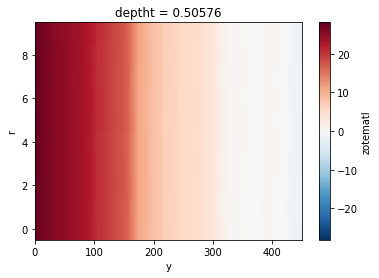

In [24]:
tmp['zotematl'].isel(x=0, deptht=0).plot()

### Testing combining data irrespective of start year

In [2]:
ppdir="/home/users/hkhatri/DePreSys4_Data/Data_Drift_Removal/Drift_Linear/"

ds = xr.open_dataset(ppdir + "Drift_diaptr.nc")

ds_lin = xr.open_dataset(ppdir + "Linear_Trend_diaptr.nc")

In [3]:
print(ds, ds_lin)

<xarray.Dataset>
Dimensions:                  (deptht: 75, depthw: 75, x: 1, y: 451, year: 10)
Coordinates:
    nav_lon                  (y, x) float32 ...
  * deptht                   (deptht) float32 0.50576 1.5558553 ... 5902.0576
  * depthw                   (depthw) float32 0.0 1.0239066 ... 5596.249 5800.0
  * year                     (year) int64 1 2 3 4 5 6 7 8 9 10
    nav_lat                  (y, x) float32 ...
Dimensions without coordinates: x, y
Data variables:
    hfbasin_atlantic         (year, y, x) float32 ...
    hfbasinpmdiff_atlantic   (year, y, x) float32 ...
    hfovgyre_atlantic        (year, y, x) float32 ...
    hfovovrt_atlantic        (year, y, x) float32 ...
    sophtadv_atlantic        (year, y, x) float32 ...
    sltbasin_atlantic        (year, y, x) float32 ...
    sltbasinpmdiff_atlantic  (year, y, x) float32 ...
    sltovgyre_atlantic       (year, y, x) float32 ...
    sltovovrt_atlantic       (year, y, x) float32 ...
    sopstadv_atlantic        (year, 

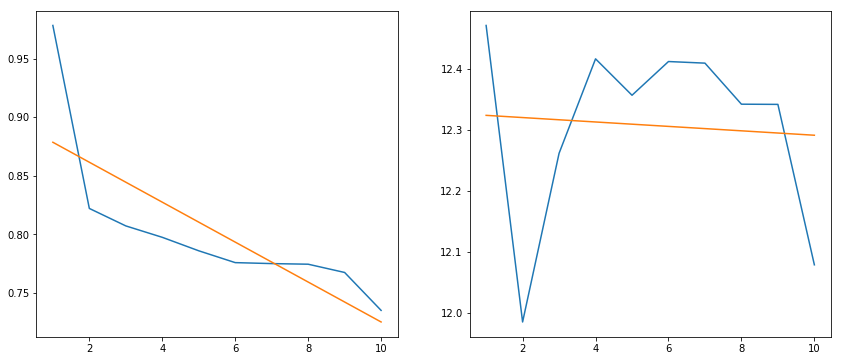

In [5]:
fig = plt.figure(figsize=[22,6])

plt.subplot(1,3,1)
plt.plot(np.arange(1,11), ds['hfbasin_atlantic'].isel(y=10,x=0))
plt.plot(np.arange(1,11), ds_lin['hfbasin_atlantic_trend'].isel(y=10,x=0))

plt.subplot(1,3,2)
plt.plot(np.arange(1,11), ds['zomsfatl'].isel(y=50,x=0, depthw=20))
plt.plot(np.arange(1,11), ds_lin['zomsfatl_trend'].isel(y=50,x=0, depthw=20))

### Linear Drift in overturning, heat/salt transports

In [3]:
ppdir="/home/users/hkhatri/DePreSys4_Data/Data_Drift_Removal/"

ds = xr.open_dataset(ppdir + 'Drift_diaptr.nc')
print(ds)

<xarray.Dataset>
Dimensions:                  (deptht: 75, depthw: 75, x: 1, y: 451, year: 10)
Coordinates:
    nav_lon                  (y, x) float32 ...
  * deptht                   (deptht) float32 0.50576 1.5558553 ... 5902.0576
  * depthw                   (depthw) float32 0.0 1.0239066 ... 5596.249 5800.0
  * year                     (year) int64 1 2 3 4 5 6 7 8 9 10
    nav_lat                  (y, x) float32 ...
Dimensions without coordinates: x, y
Data variables:
    hfbasin_atlantic         (year, y, x) float32 ...
    hfbasinpmdiff_atlantic   (year, y, x) float32 ...
    hfovgyre_atlantic        (year, y, x) float32 ...
    hfovovrt_atlantic        (year, y, x) float32 ...
    sophtadv_atlantic        (year, y, x) float32 ...
    sltbasin_atlantic        (year, y, x) float32 ...
    sltbasinpmdiff_atlantic  (year, y, x) float32 ...
    sltovgyre_atlantic       (year, y, x) float32 ...
    sltovovrt_atlantic       (year, y, x) float32 ...
    sopstadv_atlantic        (year, 

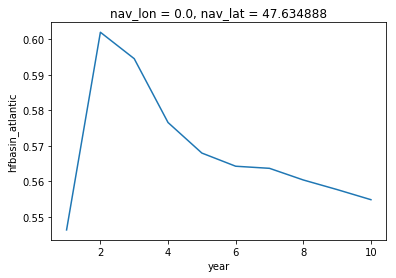

In [4]:
ds['hfbasin_atlantic'].isel(x=0,y=200).plot()

In [5]:
p = ds['hfbasin_atlantic'].isel(x=0).polyfit(dim='year', deg=1)

AttributeError: 'DataArray' object has no attribute 'polyfit'

In [2]:
!pip list

Package                  Version
------------------------ ------------
alabaster                0.7.12
asn1crypto               0.24.0
astroid                  2.1.0
atomicwrites             1.2.1
attrs                    18.2.0
Babel                    2.6.0
backcall                 0.1.0
backports.ssl            0.0.9
basemap                  1.2.0
beautifulsoup4           4.6.3
bokeh                    1.0.2
boto3                    1.9.67
botocore                 1.12.68
bottle                   0.12.13
Cartopy                  0.17.0
certifi                  2021.5.30
cf-units                 2.0.2
cffi                     1.11.5
cftime                   1.0.3.4
chardet                  3.0.4
Click                    7.0
click-plugins            1.0.4
cligj                    0.5.0
cloudpickle              0.6.1
cryptography             2.3.1
cycler                   0.10.0
Cython                   0.29.2
cytoolz                  0.9.0.1
dask                     1.0.0
decorator   